In [1]:
import pandas as pd
import numpy as np
import string

import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.datasets import make_blobs

In [106]:
X,y = make_blobs(n_samples = 20_000,
                 n_features = 2,
                 cluster_std = 1.0,
                 centers = [[3,2],[4,5]],
                 random_state = 12,
                 shuffle = False
                )
df_2exp = pd.DataFrame(X,columns=['exp1','exp2'])
df_2exp['target']= y.astype("str")
df_2exp.head()

exp1      exp2 target
0  3.472986  1.318574      0
1  3.242439  0.299264      0
2  3.753143  0.465279      0
3  3.005127  1.879772      0
4  2.193018  4.871819      0

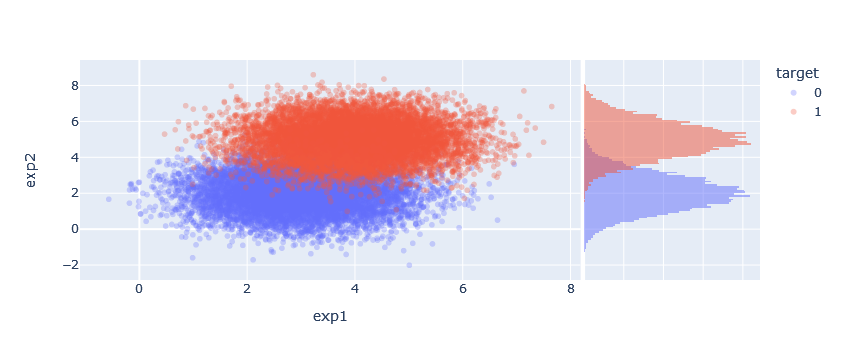

In [107]:
# scatter plot with added histogram --> good for visualizing overlap
px.scatter(df_2exp,
           x = 'exp1',
           y = 'exp2',
           opacity = 0.3,
           color = 'target',
           marginal_y = 'histogram',
          )

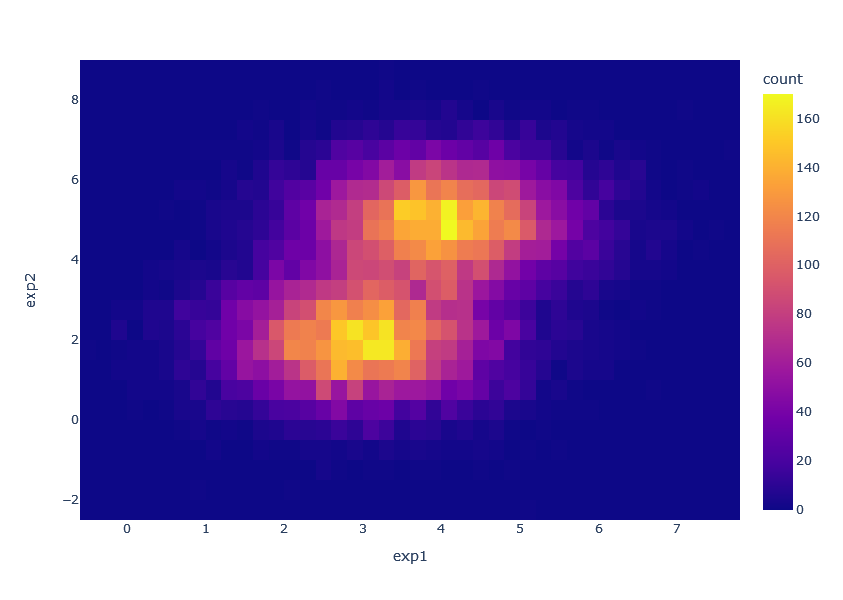

In [108]:
# density_heatmap or density contour to visualize centre and density of cluster
px.density_heatmap(df_2exp,
                   x = 'exp1',
                   y = 'exp2',
                   width = 800,
                   height = 600
                  )

In [56]:
#create multivariate sample data
num_samples= 50
num_features = 4
cols = [*string.ascii_uppercase[:num_features]]

X,y = make_blobs(n_samples = num_samples,
                          n_features = num_features,
                          center_box=[0,50],
                          cluster_std=5,
                          random_state=12
                         )
df_sample_target = pd.DataFrame(X,columns = cols).astype(int)
df_sample_target['target'] = y
df_sample_target.head()

A   B   C   D  target
0  -9  46  42   3       1
1  42   8  17  32       2
2  51   2  20  24       2
3  -1  39  41   5       1
4   2  41  49  -5       1

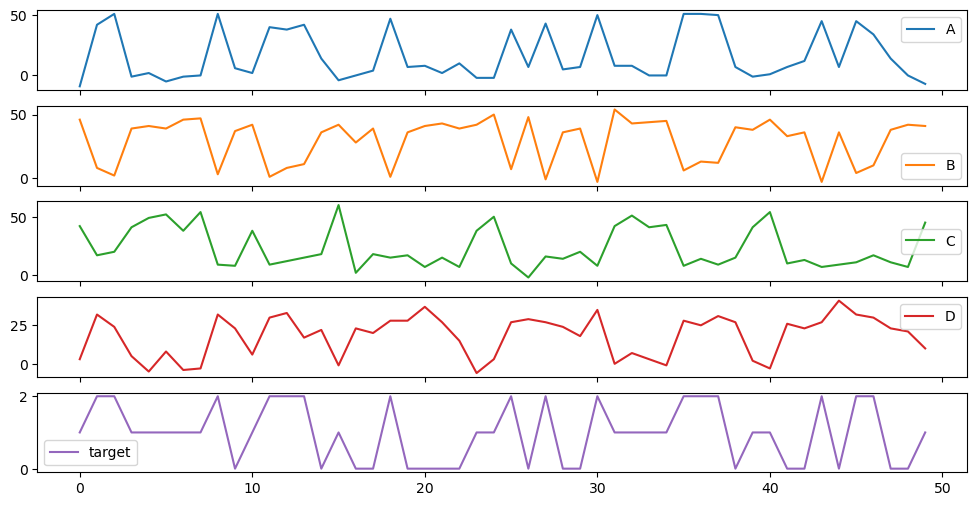

In [111]:
df_sample_target.plot(figsize = (12,6), subplots=True);

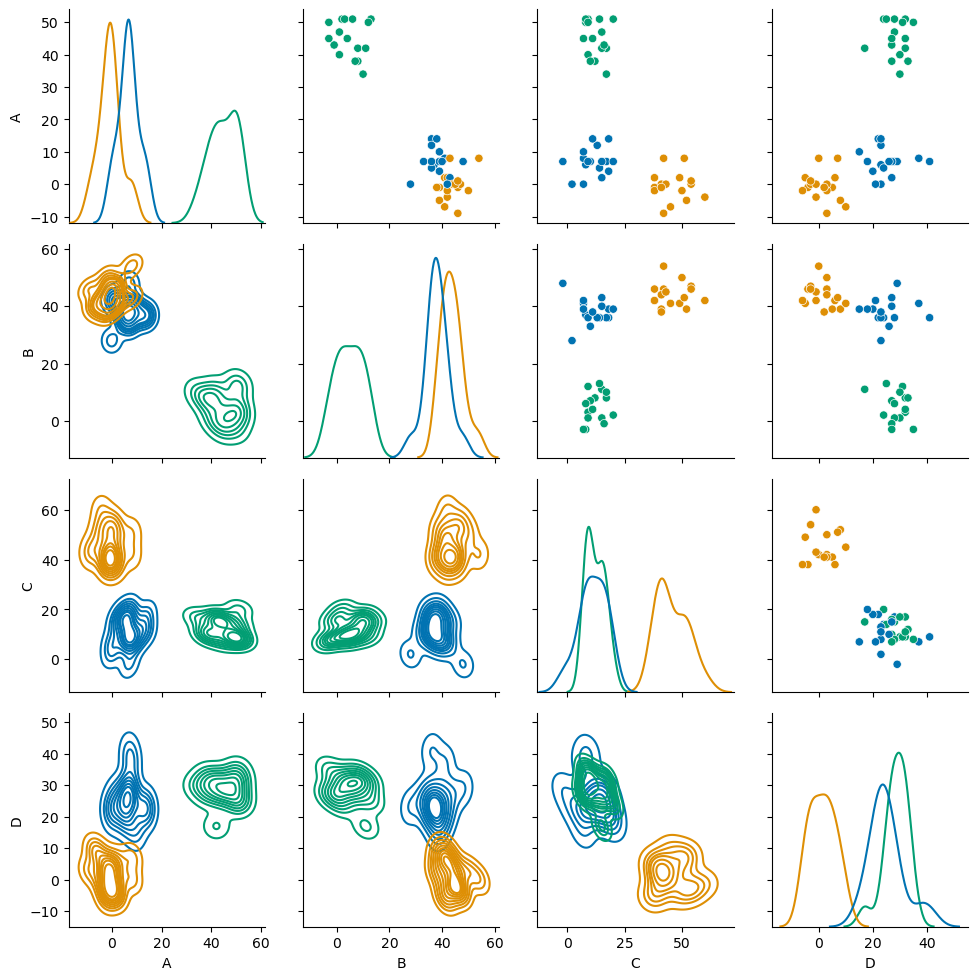

In [57]:
#creating grid plot that visualizes distribution and clustering
grid = sns.PairGrid(df_sample_target, hue= 'target', palette = 'colorblind')
grid.map_upper(sns.scatterplot)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot)

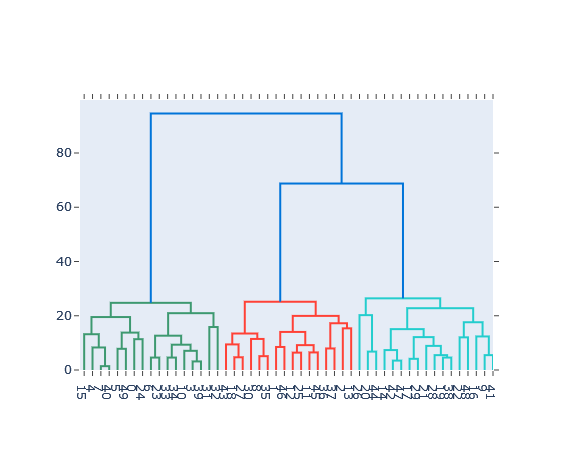

In [58]:
#dendrogram plot to cluster samples
ff.create_dendrogram(df_sample_target.select_dtypes('number'))

C:\Users\Arne\anaconda3\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



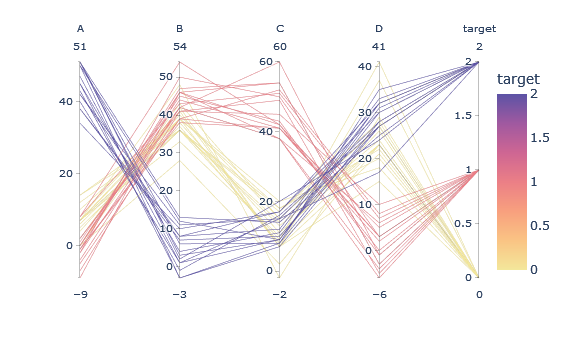

In [59]:
#parallel coordinates plot to discover patterns in the data relating to the different features
px.parallel_coordinates(df_sample_target,color ='target',color_continuous_scale= px.colors.sequential.Sunset)